In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

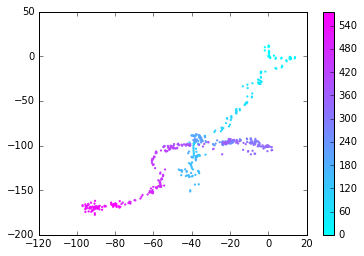

In [3]:
plt.scatter(x, y, c=np.arange(len(x)), cmap='cool', s=5, edgecolor='')
plt.colorbar()

(-100, 100)

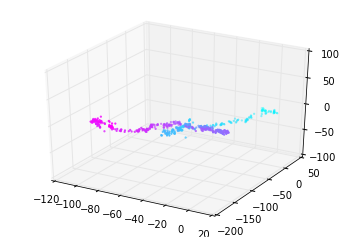

In [4]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, c=np.arange(len(x)), cmap='cool', s=5, edgecolor='')
ax.set_zlim(-100, 100)
#plt.colorbar(ax)

In [40]:
# Read all data files of all categories.
import os

trajectories_per_category = {}
categories = ['alive', 'plastic', 'fibro']
downsample_steps = {'alive': 2, 'fibro': 5, 'plastic': 5}

for category, downsample_step in zip(categories, downsample_steps):
    #data_dir = 'data/JulianTrajs/' + category
    data_dir = 'data/generated/' + category

    trajectories_per_category[category] = []  # dimensions: trajectory index -> time step -> coordinate (x, y, z)
    filenames = os.listdir(data_dir)
    for filename in filenames:
        trajectory = np.genfromtxt(os.path.join(data_dir, filename))
        trajectories_per_category[category].append(trajectory)
    trajectories_per_category[category] = np.array(trajectories_per_category[category])
    print "Category {}: Found {} files, created {} trajectories".format(category, len(filenames), len(trajectories_per_category[category]))

Category alive: Found 65 files, created 65 trajectories
Category plastic: Found 177 files, created 177 trajectories
Category fibro: Found 69 files, created 69 trajectories


In [4]:
category = 'plastic'

(-300, 300)

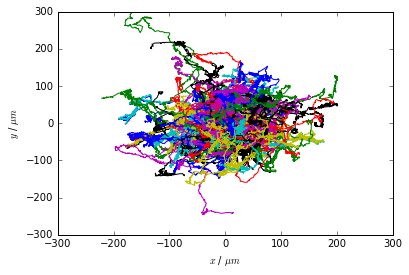

In [24]:
for trajectory in trajectories_per_category[category]:
    plt.plot(trajectory[:, 0], trajectory[:, 1])
#plt.plot(0, 0, 'ro', markersize=7, mec='none')
plt.xlabel('$x$ / $\mu m$')
plt.ylabel('$y$ / $\mu m$')
plt.xlim(-300, 300)
plt.ylim(-300, 300)
#plt.savefig('plots/all_{}.png'.format(category), dpi=300)

# TODO: Maybe make heatmap

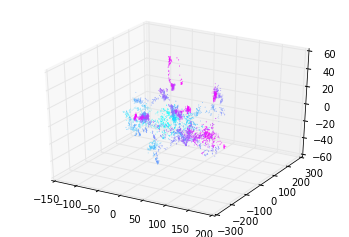

In [8]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for trajectory in trajectories[::10]:
    ax.scatter(trajectory[:, 0], trajectory[:, 1], trajectory[:, 2], c=np.arange(len(x)), cmap='cool', s=1, edgecolor='')
#ax.set_zlim(-100, 100)
plt.savefig('plots/all_alive_3D.png', dpi=300)

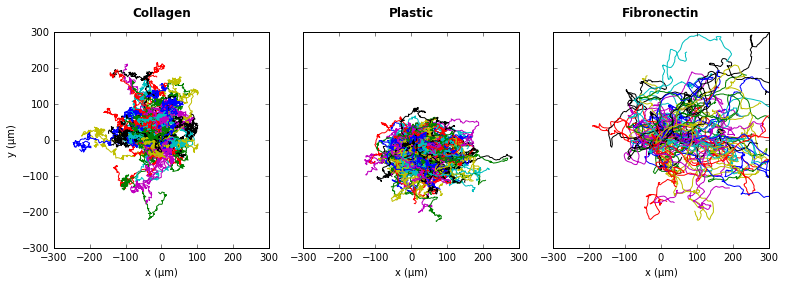

In [7]:
fig, axes = plt.subplots(ncols=3, sharex=True, sharey=True, figsize=(11, 4))
lim = 300

names = {'alive': 'Collagen', 'fibro': 'Fibronectin', 'plastic': 'Plastic'}

for i, (ax, category) in enumerate(zip(axes, categories)):
    for trajectory in trajectories_per_category[category][::downsample_steps[category]]:
        ax.plot(trajectory[:, 0], trajectory[:, 1])
    ax.set(adjustable='box-forced', aspect='equal')
    ax.set_xlim(-lim, lim)
    ax.set_ylim(-lim, lim)
    ax.set_title(names[category], fontweight='bold')
    ax.title.set_position([.5, 1.05])
    ax.set_xlabel(u'x (\u00b5m)')
    if i == 0:
        ax.set_ylabel(u'y (\u00b5m)')
plt.tight_layout()
#plt.savefig('plots/generated_all.png', dpi=300)

(-300, 300)

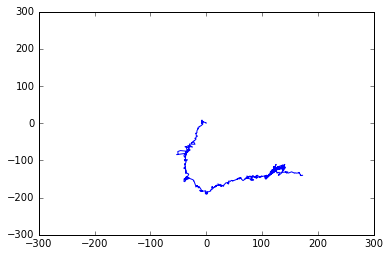

In [16]:
traj = trajectories_per_category['alive'][0]
plt.plot(traj[:, 0], traj[:, 1])
lim = 300
plt.xlim(-lim, lim)
plt.ylim(-lim, lim)

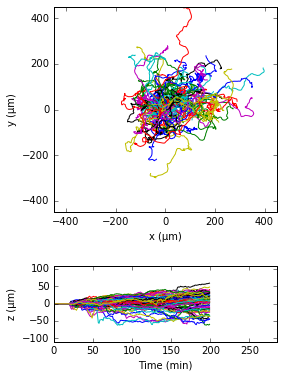

In [36]:
category = 'fibro'
plt.figure(figsize=(4, 6))
ax_xy = plt.subplot2grid((3, 1), (0, 0), rowspan=2)
for trajectory in trajectories_per_category[category]:
    ax_xy.plot(trajectory[:, 0], trajectory[:, 1])
    #ax_xy.set(adjustable='box-forced', aspect='equal')
    lim = 450
    ax_xy.set_xlim(-lim, lim)
    ax_xy.set_ylim(-lim, lim)
    ax_xy.set_xlabel(u'x (\u00b5m)')
    ax_xy.set_ylabel(u'y (\u00b5m)')

ax_z = plt.subplot2grid((3, 1), (2, 0))
for trajectory in trajectories_per_category[category]:
    ax_z.plot(trajectory[:, 2])
    lim = 110
    ax_z.set_ylim(-lim, lim)
    ax_z.set_xlim(0, 285)
    ax_z.set_xlabel(u'Time (min)')
    ax_z.set_ylabel(u'z (\u00b5m)')
    
plt.subplots_adjust(hspace=0.7)

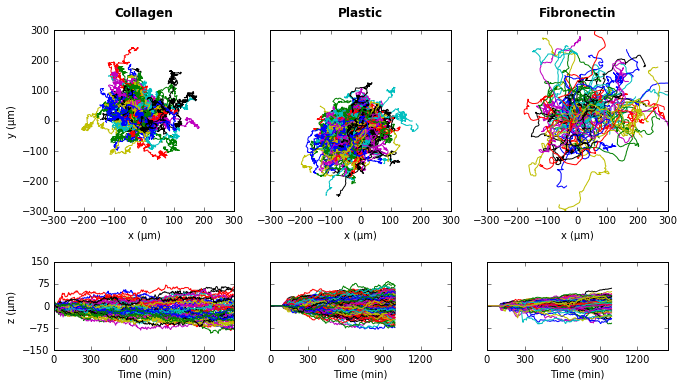

In [42]:
#fig, axes = plt.subplots(ncols=3, sharex=True, sharey=True, figsize=(11, 4))
#lim = 300

names = {'alive': 'Collagen', 'fibro': 'Fibronectin', 'plastic': 'Plastic'}
time_interval = {'alive': 2.5, 'fibro': 1., 'plastic': 1.}
plt.figure(figsize=(11, 6))

for i, category in enumerate(categories):
    
    # Make xy plot.
    ax_xy = plt.subplot2grid((3, 3), (0, i), rowspan=2)
    for trajectory in trajectories_per_category[category]:
        ax_xy.plot(trajectory[:, 0], trajectory[:, 1])
        lim = 300
        ax_xy.set_xlim(-lim, lim)
        ax_xy.set_ylim(-lim, lim)
        ax_xy.set_xlabel(u'x (\u00b5m)')
        if i == 0:
            ax_xy.set_ylabel(u'y (\u00b5m)')
        else:
            ax_xy.yaxis.set_ticklabels([])
        
        ax_xy.set_title(names[category], fontweight='bold')
        ax_xy.title.set_position([.5, 1.05])
        
        ax_xy.set(adjustable='box-forced', aspect='equal')
        
    # Make z plot.
    ax_z = plt.subplot2grid((3, 3), (2, i))
    for trajectory in trajectories_per_category[category]:
        #ax_z.plot(np.arange(len(trajectory)) * time_interval[category], trajectory[:, 2])  # Original
        ax_z.plot(np.arange(len(trajectory)) * 5., trajectory[:, 2])  # Generated
        lim = 150
        ax_z.set_ylim(-lim, lim)
        ax_z.set_xlim(0, 1442.5)
        ax_z.xaxis.set_ticks(range(0, 1401, 300))
        ax_z.yaxis.set_ticks(range(-150, 151, 75))
        ax_z.set_xlabel(u'Time (min)')
        if i == 0:
            ax_z.set_ylabel(u'z (\u00b5m)')
        else:
            ax_z.yaxis.set_ticklabels([])
    
    
#plt.tight_layout()
plt.subplots_adjust(hspace=0.4)

#plt.savefig('plots/generated_all_z.png', dpi=300)